### Linear Discriminant Analysis in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [3]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [4]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Add The "_" in the column Name
df_wine.columns = df_wine.columns.str.replace(" ","_")

In [6]:
df_wine.columns

Index(['Class_label', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280/OD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [7]:
df_wine.Class_label.value_counts()

2    71
1    59
3    48
Name: Class_label, dtype: int64

In [8]:
class_value = df_wine["Class_label"].explode().unique().tolist()
class_value

[1, 2, 3]

In [9]:
class_count = len(class_value)
class_count

3

In [10]:
X_ori = df_wine.drop("Class_label",axis=1).values
y_ori = df_wine["Class_label"].values

In [11]:
print(X_ori.shape)
print(y_ori.shape)
print(type(X_ori))
print(type(y_ori))

(178, 13)
(178,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
features = X_ori.shape[1]
features

13

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_ori,y_ori,test_size=0.3,random_state=42)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(type(X_train))
print(type(y_train))

(124, 13)
(124,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
print(X_test.shape)
print(y_test.shape)
print(type(X_test))
print(type(y_test))

(54, 13)
(54,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
# scale the data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X_train)

StandardScaler()

In [18]:
# scale the training datatset
X_train_scale = scale.transform(X_train)
y = y_train

In [19]:
# scale the test datatset
X_test_scale = scale.transform(X_test)

In [20]:
X = X_train_scale

In [21]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(124, 13)
(124,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [22]:
np.round(X.mean(),4)

0.0

LDA is based upon the concept of searching for a linear combination of variables (predictors) that best separates two classes (targets)
Here are the 5 steps that constitute LDA.

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/LDA_Steps.png" width="550" height="600" align="left"/></img>

### 1. Create the mean vector for all 3 classes

In [23]:
#np.mean(X)

In [24]:
#c1 = np.mean(X[y==1],axis=0)
#c1

In [25]:
#c2 = np.mean(X[y==2],axis=0)
#c2

In [26]:
#c3 = np.mean(X[y==3],axis=0)
#c3

In [27]:
#type(c1)

In [28]:
#V_mean = []

In [29]:
#type(V_mean)

In [30]:
#for i in [c1,c2,c3]:
#    V_mean.append(i)

In [31]:
#V_mean

In [32]:
#Another way to compute the "V_mean" , we can directly use for loop to compute the mean of each class corresponding to each columns
V_mean = []
for i in class_value: # clsses
    V_mean.append(np.mean(X[y==i],axis=0))
    print("mean vector for class %s : %s\n" % (i,V_mean[i-1]))

mean vector for class 1 : [ 0.93897593 -0.36706207  0.30420702 -0.79393526  0.44892803  0.88914993
  0.96562026 -0.49124188  0.55803006  0.21694825  0.45068982  0.77049323
  1.17072198]

mean vector for class 2 : [-0.85970362 -0.32935245 -0.3958741   0.29797788 -0.30832714 -0.04961672
  0.06144507 -0.03008465  0.1508999  -0.86704092  0.42607802  0.28089573
 -0.69490638]

mean vector for class 3 : [ 0.15959246  0.91617957  0.22427718  0.49583872 -0.07472835 -0.97309298
 -1.22638422  0.62217375 -0.87841758  1.01982694 -1.15680864 -1.31954459
 -0.35539884]



In [33]:
V_mean  = np.round(V_mean,4)
#V_mean

### 2.1 Create the scatter matrix With-in class (S_w)

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/WithinClass.png" width="350" height="600" align="left"/></img>

where c is the total number of distinct classes

where x is a sample (i.e. row) and n is the total number of samples with a given class.

In [34]:
# total no of features or we can say variables
d = features

# define Witn-in class scatter matrix 
S_w = np.zeros((d,d))

# lets calculate the scatter matrix of each class and then Witn-in class

# For loop for the Witn-in Class Scatter Matrix S_w
for c,mv in zip(class_value,V_mean):  # label is the no of the classes
    
    # define class scatter matrix 
    S_k = np.zeros((d,d))
    
    # for loop for the Class Scatter Matrix
    for i in X[y==c]:
        # Make the column vectors to calculate the scatter matrix of each class
        x = i.reshape(d,1)
        mi = mv.reshape(d,1)
        # make the class scatter matrix using the column vectors
        S_k += (x-mi).dot((x-mi).T)
    
    # Now sum all the Class scatter Matrix
    S_w += S_k

In [35]:
#x = X[y==1]

In [36]:
#x.shape

In [37]:
S_w.shape

(13, 13)

In [38]:
S_w = np.round(S_w,4)
#S_w

### 2.2 Create the scatter matrix Between the classes (S_b)

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/betweenclass.png" width="400" height="600" align="left"/></img>

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/betweenclass1.png" width="300" height="600" align="left"/></img>

In [39]:
# Lets calculate the Between class scatter matrix S_b

# total no of variables
d = features

# Define the Between Scatter Matrix
S_b = np.zeros((d,d))

# for loop to calculate the Between Scatter Matrix S_b

for c,mv in enumerate(V_mean,start=1):
    
    # calculate the size of the individual classes
    n = X[y == c].shape[0]
    
    # Calculate the column class mean vector
    mi = mv.reshape(d,1)
    
    # Lets calculate the Overall mean and convert into column vector
    m = np.mean(X,axis=0).reshape(d,1)
    
    # Now lets calculate the Between Scatter Matrix using the formula as mention above
    
    S_b += n*((mi-m).dot((mi-m).T)) 

In [40]:
#n = X[y == c].shape[0]

In [41]:
#n

In [42]:
S_b.shape

(13, 13)

In [43]:
#S_b

### 3. Calculate the Eigen Value and Eigen Vectors 

Now we will solve the generalized eigenvalue problem for the below matrix to obtain the linear discriminants.

<img src="https://raw.githubusercontent.com/atulpatelDS/Machine_Learning/master/Images/Gerenalized_matrix.PNG" width="200" height="600" align="left"/></img>

In [44]:
Eigen_values,Eigen_vectors = np.linalg.eig(np.linalg.inv(S_w).dot(S_b))

In [45]:
print(Eigen_values.shape)
print(Eigen_vectors.shape)

(13,)
(13, 13)


In [46]:
Eigen_values

array([ 8.93902116e+00+0.00000000e+00j,  3.95241708e+00+0.00000000e+00j,
        9.92705293e-09+0.00000000e+00j,  8.87021085e-16+0.00000000e+00j,
       -5.75526301e-16+3.33115366e-16j, -5.75526301e-16-3.33115366e-16j,
        4.12209414e-16+0.00000000e+00j, -5.50174685e-16+0.00000000e+00j,
       -3.75850491e-16+0.00000000e+00j, -5.98659672e-19+3.10228874e-16j,
       -5.98659672e-19-3.10228874e-16j,  6.32521745e-17+0.00000000e+00j,
        5.02774325e-18+0.00000000e+00j])

### 4. Sort the Eigen_vectors by using Eigen_values

In [47]:
#ids = Eigen_values.argsort()

In [48]:
#ids

In [49]:
#Eigen_vector_sorted = Eigen_vectors[:,ids] 

In [50]:
eigen_value_vector_pair = [(np.abs(Eigen_values[i]),Eigen_vectors[:,i]) for i in range(len(Eigen_values))]

In [51]:
eigen_value_vector_pair = sorted(eigen_value_vector_pair,key=lambda k:k[0],reverse=True)

In [52]:
# Display the Eigen_values in decreasing order
for i,j in enumerate(eigen_value_vector_pair,start=1):
    print("Eigen Value {} : {}".format(i,j[0]))

Eigen Value 1 : 8.939021155538134
Eigen Value 2 : 3.9524170807690133
Eigen Value 3 : 9.927052927577906e-09
Eigen Value 4 : 8.870210852882995e-16
Eigen Value 5 : 6.649784735720713e-16
Eigen Value 6 : 6.649784735720713e-16
Eigen Value 7 : 5.501746847612816e-16
Eigen Value 8 : 4.122094141447847e-16
Eigen Value 9 : 3.758504906936685e-16
Eigen Value 10 : 3.1022945162019336e-16
Eigen Value 11 : 3.1022945162019336e-16
Eigen Value 12 : 6.325217448443546e-17
Eigen Value 13 : 5.027743250874774e-18


In [53]:
# Calculate the explained Variance
print("Explained Varinace :\n")
sum_eigen_values = sum(Eigen_values.real)
for i, j in enumerate(eigen_value_vector_pair,start=1):
    print("Eigen Value {} : {}".format(i,(j[0]/sum_eigen_values)*100))

Explained Varinace :

Eigen Value 1 : 69.34075922947828
Eigen Value 2 : 30.659240693516715
Eigen Value 3 : 7.700500702842648e-08
Eigen Value 4 : 6.880699176815378e-15
Eigen Value 5 : 5.158295458354481e-15
Eigen Value 6 : 5.158295458354481e-15
Eigen Value 7 : 4.267752552140539e-15
Eigen Value 8 : 3.1975440309400528e-15
Eigen Value 9 : 2.91550472115445e-15
Eigen Value 10 : 2.4064766529119935e-15
Eigen Value 11 : 2.4064766529119935e-15
Eigen Value 12 : 4.9065258100982215e-16
Eigen Value 13 : 3.900063867849237e-17


### 5. Select the top k Eigen_vectors

In [54]:
explained_var = np.round(((Eigen_values.real)/sum(Eigen_values.real)),4)

In [55]:
explained_var

array([ 0.6934,  0.3066,  0.    ,  0.    , -0.    , -0.    ,  0.    ,
       -0.    , -0.    , -0.    , -0.    ,  0.    ,  0.    ])

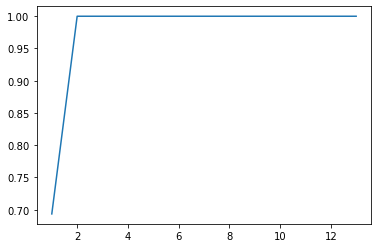

In [56]:
plt.plot(range(1,features+1),np.cumsum(explained_var))

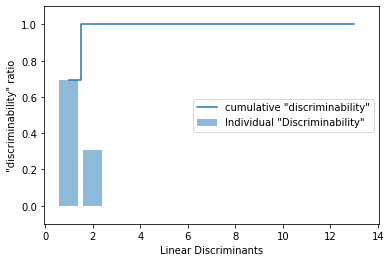

In [57]:
plt.bar(range(1,features+1),explained_var,alpha = 0.5,align = "center",label = 'Individual "Discriminability"')
plt.step(range(1, features+1),np.cumsum(explained_var), where='mid', label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.show()

Discriminative Ratio is the S_b/S_w ,means ratio of "Distance between classes"/"Distance within Class".
If it is close to 1 than measn there is much separation between the class and very very less variance within the class datasets.If we see the above graph we will observe that 1st Linear discriminant(Eigen Vector) is able to explain close to 70% discriminability and 2nd close to 30%.If we take cumulative of 1st and 2nd components (Eigen Vectors) , both components cumulatively are able to explain close to 100% discriminability(see the blue line).

### 6. Form the 'd x k' dimentional matrix W

it is now time to construct our d X k dimensional eigenvector
matrix W (here 13X2) and thereby reducing the initial 13 dimensional feature space into a 2 dimensional feature
subspace. As we found that 2 eigen vectors are able to explain close to 100% discriminability so we will create a matrix W with the first two eigenvectors.

In [58]:
type(eigen_value_vector_pair)

list

In [59]:
# 1st eigen vector
ev1 = eigen_value_vector_pair[0][1].real
ev2 = eigen_value_vector_pair[1][1].real

In [60]:
ev1.shape

(13,)

In [61]:
ev2.shape

(13,)

In [62]:
W = np.hstack((ev1.reshape(features,1),ev2.reshape(features,1)))

In [63]:
W.shape

(13, 2)

In [64]:
W

array([[-0.11727944, -0.42224992],
       [ 0.07554281, -0.1553273 ],
       [-0.04493831, -0.43067183],
       [ 0.24251435,  0.39093574],
       [ 0.00409591, -0.00143299],
       [ 0.18498309, -0.10750486],
       [-0.70711234,  0.26438457],
       [-0.06954694,  0.08603312],
       [ 0.03888924,  0.16977139],
       [ 0.35082905, -0.33702165],
       [-0.07542071,  0.16985548],
       [-0.35334738,  0.06359842],
       [-0.3542456 , -0.4417099 ]])

### 6. Use matrix W to transform the samples onto a new subspace Y

we will use the dot product of X and W to get the new matrix Y.
where X is a n×d matrix with n samples and d dimensions, and Y is a n×k matrix with n samples and k ( k<n) dimensions. In other words, Y is composed of the LDA components, or in another way, the new feature space.

In [65]:
Y = X.dot(W)

In [66]:
print(Y.shape)
print(type(Y))

(124, 2)
<class 'numpy.ndarray'>


### Plot the data with 2 LDA components

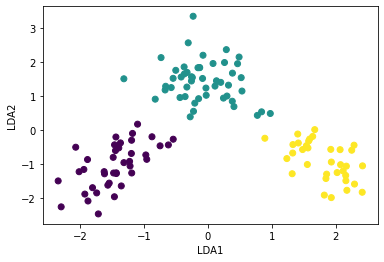

In [67]:
plt.scatter(x= Y[:,0],y = Y[:,1],c = y)
plt.xlabel("LDA1")
plt.ylabel("LDA2")
plt.show()

### Lets compare the result with SKLEARN LDA Class

In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [69]:
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)

LinearDiscriminantAnalysis()

In [70]:
lda.explained_variance_ratio_

array([0.69340706, 0.30659294])

In [71]:
# Lets apply the LDA with 2 LDA components

In [72]:
lda_2 = LinearDiscriminantAnalysis(n_components=2)
lda_2.fit(X,y)

LinearDiscriminantAnalysis(n_components=2)

In [73]:
# transform the training datatset
X_sk_lda = lda_2.transform(X)

In [74]:
# transform the test datatset
X_sk_lda_test = lda_2.transform(X_test_scale)

In [75]:
X_sk_lda.shape

(124, 2)

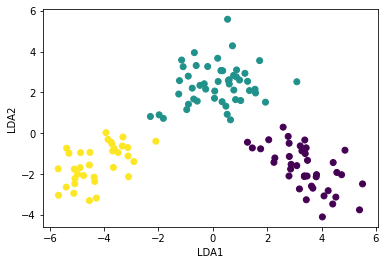

In [76]:
plt.scatter(x= X_sk_lda[:,0],y = X_sk_lda[:,1],c = y)
plt.xlabel("LDA1")
plt.ylabel("LDA2")
plt.show()

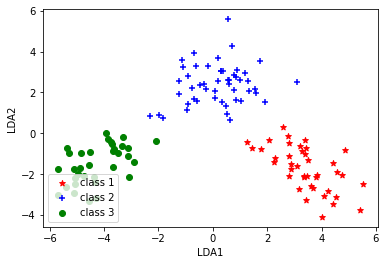

In [77]:
# Plot the graph with anotation
for label,marker,color in zip(range(1,class_count+1),("*","+","o"),("red","blue","green")):
    plt.scatter(x= X_sk_lda[:,0][y==label],y = X_sk_lda[:,1][y==label],color=color,
                marker=marker,label="class {}".format(label))
plt.xlabel("LDA1")
plt.ylabel("LDA2")
plt.legend(loc= "lower left")
plt.show()

#### We can see that results are same with Python and sklearn

### Lets Compare with PCA

In [78]:
from sklearn.decomposition import PCA

In [79]:
pca = PCA()

In [80]:
pca.fit(X)

PCA()

In [81]:
pca.explained_variance_

array([4.74376552, 2.45913372, 1.5276711 , 0.99327678, 0.92313257,
       0.59663887, 0.46974164, 0.34681782, 0.28504118, 0.25665489,
       0.23096439, 0.17349645, 0.09935613])

In [82]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36196226, 0.54960087, 0.66616635, 0.74195608, 0.81239361,
       0.85791879, 0.89376135, 0.9202245 , 0.94197392, 0.96155739,
       0.9791806 , 0.99241886, 1.        ])

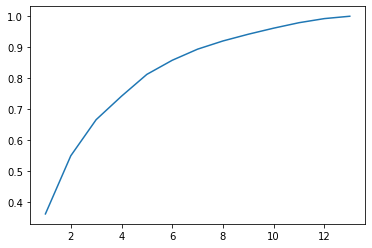

In [83]:
plt.plot(range(1,features+1),np.cumsum(pca.explained_variance_ratio_))

In [84]:
# we can see number of Principal components = 10 which are able to explain more that 90% of data when we use scalling

In [85]:
pca_10 = PCA(n_components=10)   # with scalling
pca_10.fit(X)

PCA(n_components=10)

In [86]:
# transform the training datatset
X_sk_pca = pca_10.transform(X)

In [87]:
# transform the test scale datatset
X_sk_pca_test = pca_10.transform(X_test_scale)

In [88]:
X_sk_pca.shape

(124, 10)

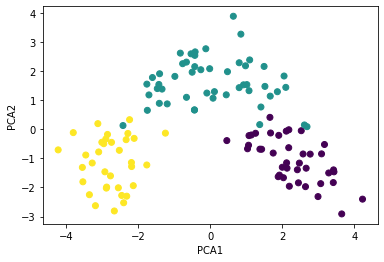

In [89]:
plt.scatter(x= X_sk_pca[:,0],y = X_sk_pca[:,1],c = y)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

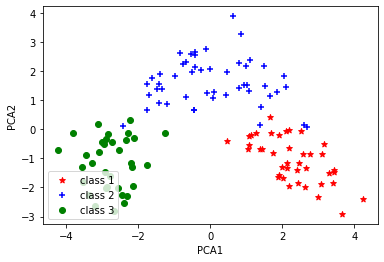

In [90]:
# Plot the graph with anotation
for label,marker,color in zip(range(1,class_count+1),("*","+","o"),("red","blue","green")):
    plt.scatter(x= X_sk_pca[:,0][y==label],y = X_sk_pca[:,1][y==label],color=color,marker=marker,
                label="class {}".format(label))
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(loc= "lower left")
plt.show()

We can see that If we use PCA there are overlap in classes becuase PCA only selected components on the input dataset variance although LDA consider the output classes variaces with input dataset.

### Lets compare the Accuracy with PCA and LDA with scalling dataset

#### Accuracy with LDA

In [91]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [92]:
knn_lda = KNeighborsClassifier()

In [93]:
knn_lda.fit(X_sk_lda,y)

KNeighborsClassifier()

In [94]:
y_pred_lda = knn_lda.predict(X_sk_lda_test)

In [95]:
lda_accuracy = metrics.accuracy_score(y_test,y_pred_lda)
lda_accuracy

0.9814814814814815

#### Accuracy with PCA

In [96]:
knn_pca = KNeighborsClassifier()

In [97]:
knn_pca.fit(X_sk_pca,y)

KNeighborsClassifier()

In [98]:
y_pred_pca = knn_pca.predict(X_sk_pca_test)

In [99]:
pca_accuracy = metrics.accuracy_score(y_test,y_pred_pca)
pca_accuracy

0.9629629629629629